## TP 2 TSIA 204 Billy Nicolas


1)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import scipy
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from scipy.stats import t

In [3]:
# show dataset
housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# Display the first rows of the dataset
housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


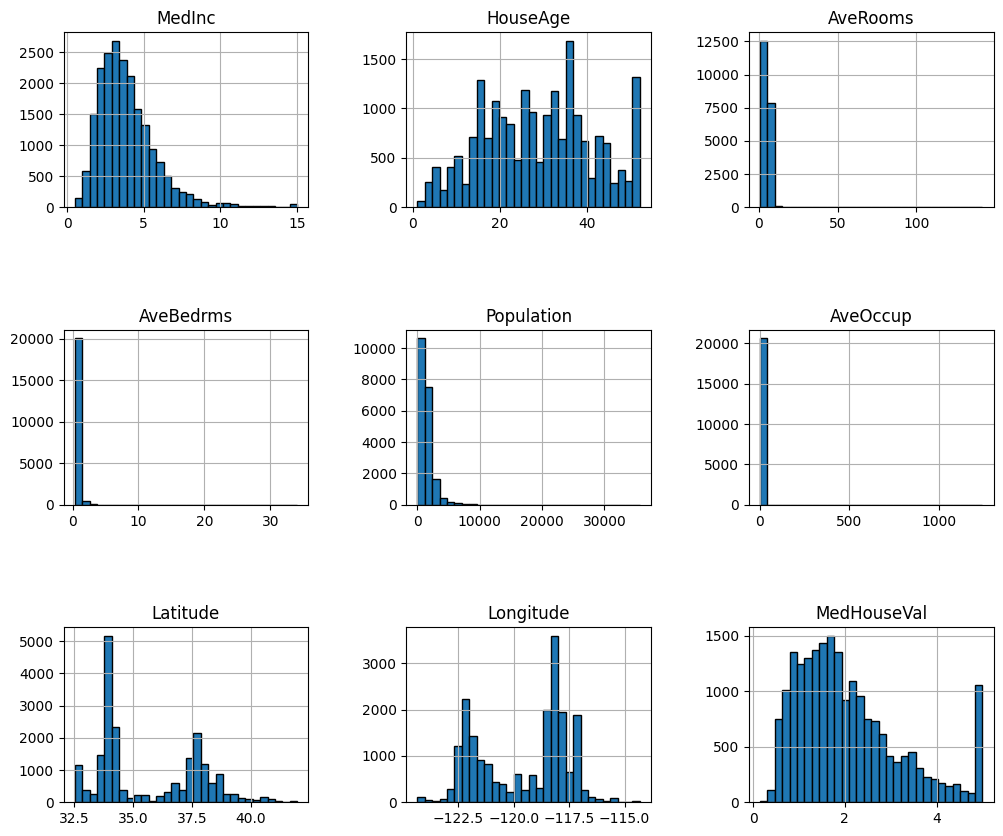

In [6]:
# Plot histograms of the housing data
housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.7, wspace=0.4)

1.

a)

In [7]:
def compute_mse(y_true, y_pred):
    # Compute the mean squared error
    mse = np.mean((y_true - y_pred) ** 2)
    
    return mse

def compute_r2(y_true, y_pred):
    # Compute the R2 coefficient
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    
    return r2

In [8]:
display(housing.target)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [9]:

data = housing.data
target = housing.target

data_standardized = StandardScaler().fit_transform(data)    
data_standardized = np.c_[np.ones(data_standardized.shape[0]), data_standardized]   

X_train, X_test, y_train, y_test = train_test_split(data_standardized,target, test_size=0.2, random_state=0)

# Estimate the coefficients using the normal equations
ols = LinearRegression()

ols.fit(X_train, y_train)

y_pred_train = ols.predict(X_train)
y_pred_test = ols.predict(X_test)

# Use sklearn to compute the MSE and R2

# Compute and print the MSE and R2
print("MSE test:", compute_mse(y_test, y_pred_test))
print("MSE train:", compute_mse(y_train, y_pred_train))

print("R2 test:", compute_r2(y_test, y_pred_test))
print("R2 train:", compute_r2(y_train, y_pred_train))


# Compute and print the MSE and R2 using sklearn
print("Sklearn MSE train:", mean_squared_error(y_train, y_pred_train))
print("Sklearn MSE test:", mean_squared_error(y_test, y_pred_test))

print("Sklearn R2 train :", r2_score(y_train, y_pred_train))
print("Sklearn R2 test :", r2_score(y_test, y_pred_test))

MSE test: 0.5289841670367208
MSE train: 0.5234413607125448
R2 test: 0.5943232652466204
R2 train: 0.6088968118672871
Sklearn MSE train: 0.5234413607125448
Sklearn MSE test: 0.5289841670367208
Sklearn R2 train : 0.6088968118672871
Sklearn R2 test : 0.5943232652466204


b)

Intervalles de confiance

In [10]:
# Compute the mean of y_train
m = np.mean(y_train)

# Get the coefficients from the model
coefficients = ols.coef_

# Predict the values
y_pred = X_train @ coefficients

# Compute the standard deviation
sigma = np.sqrt(1 / (len(y_train) - 8 - 1) * np.sum((y_train - y_pred) ** 2))

# Compute the t-value
t = scipy.stats.t.ppf(1 - 0.01 / 2, len(y_train) - 8 - 1)

# Compute the diagonal of the matrix
diag = np.linalg.inv(X_train.T @ X_train).diagonal() ** 0.5

# Compute the lower and upper bounds
lower_bound = coefficients - t * sigma * diag
upper_bound = coefficients + t * sigma * diag

# Print the coefficients and their bounds
for i in range(len(coefficients)):
    print(f"coef_{i} : {coefficients[i]} in [{lower_bound[i]}, {upper_bound[i]}]")

coef_0 : 0.0 in [-0.04398645160867966, 0.04398645160867966]
coef_1 : 0.8232362736746687 in [0.7538415800778073, 0.89263096727153]
coef_2 : 0.11695781650560455 in [0.0679825485251554, 0.1659330844860537]
coef_3 : -0.24405487363836695 in [-0.37101559566971565, -0.11709415160701828]
coef_4 : 0.28112444928068103 in [0.16597910249968817, 0.3962697960616739]
coef_5 : -0.00856338619705127 in [-0.0551115988107489, 0.03798482641664636]
coef_6 : -0.04928231283988504 in [-0.12050038027697266, 0.021935754597202588]
coef_7 : -0.9001739121966513 in [-1.0344954548675294, -0.7658523695257733]
coef_8 : -0.8698443646179163 in [-1.001761026631037, -0.7379277026047955]


2.



In [11]:
# Import the data
filename = 'data.csv'
data = pd.read_csv(filename, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


On va regarder la moyenne et la variance pour chaque ligne

In [12]:
# Calculate the mean
mean = data.mean()

# Calculate the standard deviation
std = data.std()

# Print the mean
print('MEAN')
print(mean)

# Print a blank line
print(' ')

# Print the standard deviation
print('STANDARD DEVIATION')
print(std)

MEAN
0      1.004727e-17
1     -8.037814e-18
2      1.607563e-17
3      0.000000e+00
4     -4.018907e-18
           ...     
206    1.281027e-17
207    8.037814e-18
208    1.205672e-17
209    1.406617e-17
210    1.521335e+02
Length: 211, dtype: float64
 
STANDARD DEVIATION
0       1.001133
1       1.001133
2       1.001133
3       1.001133
4       1.001133
         ...    
206     1.001133
207     1.001133
208     1.001133
209     1.001133
210    77.093005
Length: 211, dtype: float64


In [13]:
# Compute the 95th percentile of the target variable
q = data.iloc[:, -1].quantile(0.95)

# Keep only the samples in the dataset that are below the 95th percentile
data = data[data.iloc[:, -1] < q]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.25, random_state=0)

# Standardize the training and testing sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regular OLS
ols = LinearRegression()
ols.fit(X_train, y_train)

# Estimate the coefficients using the normal equations
y_pred_test = ols.predict(X_test)
y_pred_train = ols.predict(X_train)

# Compute and print the MSE and R2
print("MSE train:", mean_squared_error(y_train, y_pred_train))
print("MSE test:", mean_squared_error(y_test, y_pred_test))
print("R2 train:", r2_score(y_train, y_pred_train))
print("R2 test:", r2_score(y_test, y_pred_test))

MSE train: 2874.94371409619
MSE test: 4161.081255025407
R2 train: 0.4258412111755395
R2 test: 0.022839913853696103


3.


a) 

In [14]:
def linear_regression_coef_min(X,y):
    n , p = X.shape
    p_values = []
    coefficients = []

    X_t = X.T
    Gram = np.dot(X_t,X)
    Gram_inv = np.linalg.inv(Gram)  

    for j in range(p):

        ols = LinearRegression()
        
        X_j = X[:,j].reshape(-1,1)

        ols.fit(X_j, y)
       
        y_pred = ols.predict(X_j)

        # compute p value

        std_estimate = np.sqrt((np.linalg.norm(y-y_pred))**2/(n - 2))
        
        Gram_coef = Gram_inv[j][j]

        # Formula of the course

        T_j = np.abs(ols.coef_) * np.sqrt(n - 1) / (std_estimate*np.sqrt(Gram_coef))

        p_value = 2*(1-t.cdf(T_j, n-2))

        coefficients.append(ols.coef_[0])
        
        p_values.append(p_value)

    if not p_values:
        return None, None
    
    j_min = int(np.argmin(p_values))

    return coefficients[j_min], p_values[j_min]

b. c.

In [15]:
def variable_selection(X,y):
    S = []
    p_values_S = []

    n , p = X.shape

    i = 0
    p_value = 0

    while i < p and p_value < 0.05:

        j, p_value = linear_regression_coef_min(X,y)

        if j is None and p_value is None:
            break

        p_values_S.append(p_value)
        j = int(j)
        Xf = X[:,j].reshape(-1,1)

        S.append(Xf)

        X = np.delete(X, j, axis=1)

        # substract the residuals of the regression of y on Xf

        ols = LinearRegression()

        ols.fit(Xf, y)

        y_pred = ols.predict(Xf)

        y = y - y_pred
    
        i += 1

    return S, p_values_S


J'obtenais des valeurs négatives pour $ (X^T,X)[j,j]$, ce qui entrainait des erreurs pour cette résolution

## Extensions

In [16]:
def regression_penalties(model, X_train, y_train, Low_boundary, Upper_boundary):
    # Attention Low_boundary et Upper_boundary doivent etre des puissances de 10
    
    # Pour faire marcher np.logspace, on extrait les puissances de 10
    
    Low_boundary = np.log(Low_boundary)/np.log(10)
    Upper_boundary = np.log(Upper_boundary)/np.log(10)

    penalty_values = np.logspace(Low_boundary,Upper_boundary,30)

    Coeffs = []

    R2_list = []

    for i in range(30):

        penalty = penalty_values[i]

        model.set_params(alpha=penalty)
        
        model.fit(X_train, y_train)

        y_pred = model.predict(X_train)

        Coeffs.append(model.coef_)

        R2_list.append(r2_score(y_train, y_pred))


    return Coeffs, penalty_values, R2_list



4. Ridge

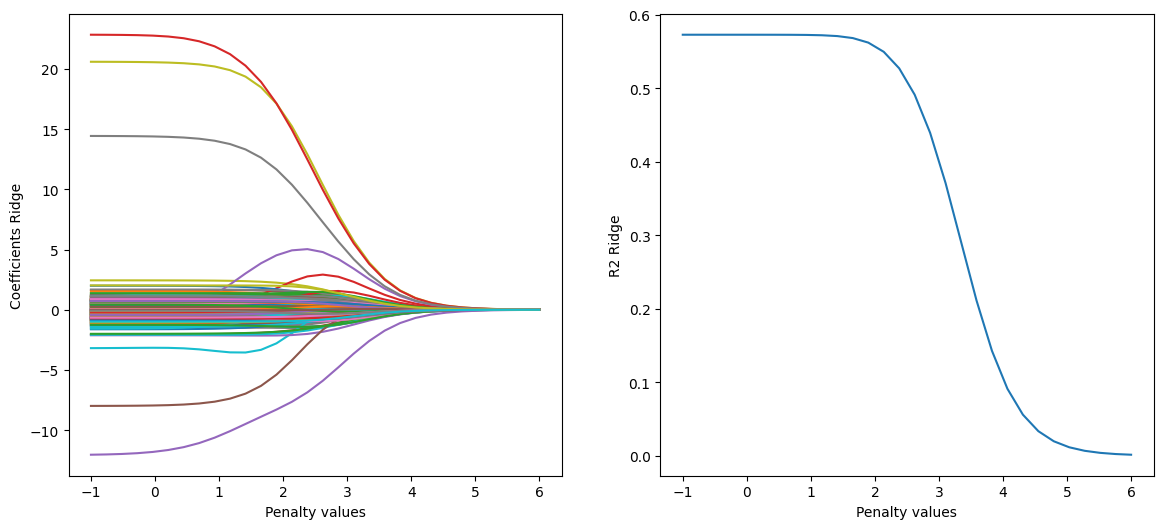

In [17]:
Coeffs_rdg, penalty_values_rdg , R2_rdg = regression_penalties(Ridge(), X_train, y_train, 1e-1, 1e6)

# Plot the coefficients and the R2
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

penalties_log = np.log( penalty_values_rdg)/np.log(10)

ax[0].plot(penalties_log, Coeffs_rdg)
ax[0].set_xlabel('Penalty values')
ax[0].set_ylabel('Coefficients Ridge')

ax[1].plot(penalties_log, R2_rdg)
ax[1].set_xlabel('Penalty values')
ax[1].set_ylabel('R2 Ridge')

plt.show()

5) Lasso

C:\Users\Nicolas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.749e+04, tolerance: 1.572e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nicolas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.294e+04, tolerance: 1.572e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nicolas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCach

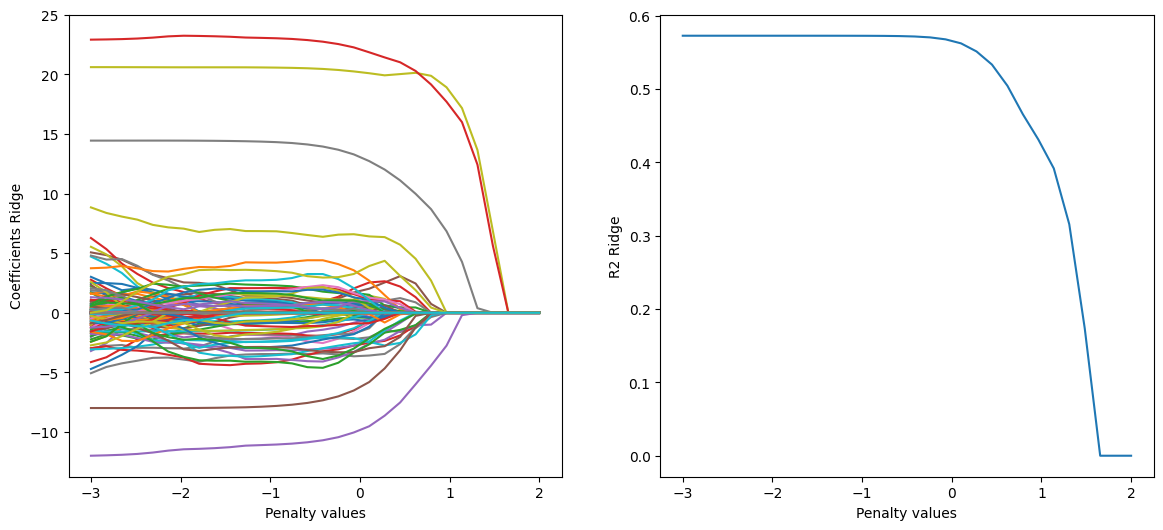

In [18]:
Coeffs_lasso, penalty_values_lasso , R2_lasso = regression_penalties(Lasso(), X_train, y_train, 1e-3, 1e2)

# Plot the coefficients and the R2
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

penalties_log = np.log( penalty_values_lasso)/np.log(10)

ax[0].plot(penalties_log, Coeffs_lasso)
ax[0].set_xlabel('Penalty values')
ax[0].set_ylabel('Coefficients Ridge')

ax[1].plot(penalties_log, R2_lasso)
ax[1].set_xlabel('Penalty values')
ax[1].set_ylabel('R2 Ridge')

plt.show()

6) Elsatic Net

C:\Users\Nicolas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.278e+05, tolerance: 1.572e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nicolas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+05, tolerance: 1.572e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nicolas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCach

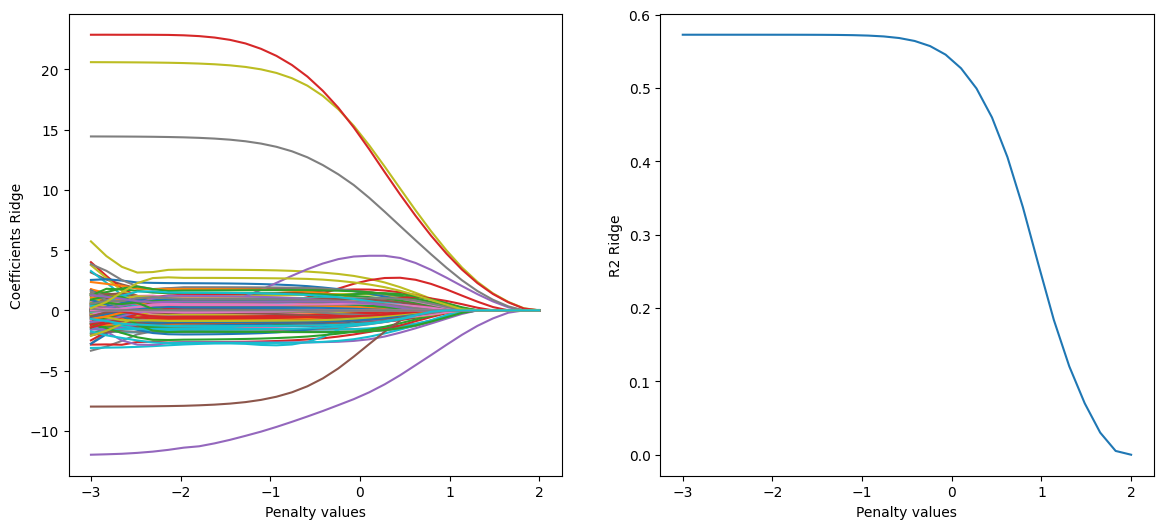

In [19]:
Coeffs_ElNet, penalty_values_ElNet , R2_ElNet = regression_penalties(ElasticNet(), X_train, y_train, 1e-3, 1e2)

# Plot the coefficients and the R2
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

penalties_log = np.log( penalty_values_ElNet)/np.log(10)

ax[0].plot(penalties_log, Coeffs_ElNet)
ax[0].set_xlabel('Penalty values')
ax[0].set_ylabel('Coefficients Ridge')

ax[1].plot(penalties_log,  R2_ElNet)
ax[1].set_xlabel('Penalty values')
ax[1].set_ylabel('R2 Ridge')

plt.show()

## PCR


7. U, s, V = SVD(X^T X)

In [20]:
X = X_train
cov_mat = np.dot(X.T,X)

U, s, V = np.linalg.svd(cov_mat)

a. Heatmap

Text(0.5, 1.0, 'Heatmap')

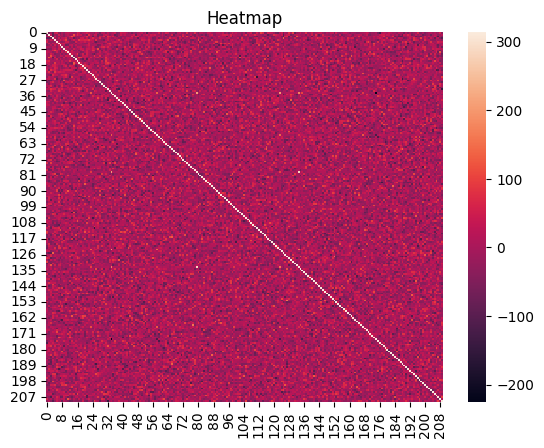

In [21]:
sns.heatmap(data = cov_mat)
plt.title('Heatmap')

b. PCA using SVD

In [22]:
# Compute the principal composent

X_pca = np.dot( X, V[:,0:2])

c. 
We showed in the lesson that: $\sigma _i ^2= \frac{\lambda _i}{n-1} $

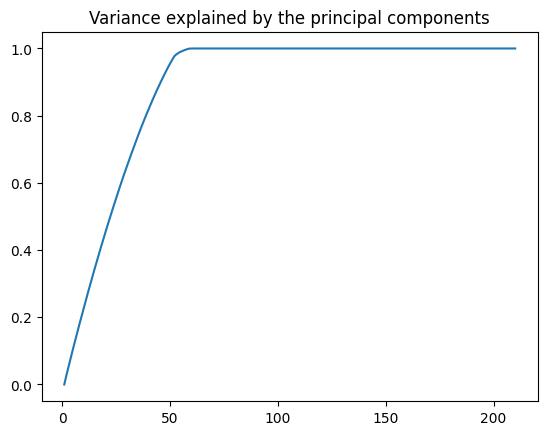

In [30]:
var = []
n , p = X.shape
for k in range(1,p+1):
    var.append(np.sum(s[:k-1]))
var = var / np.sum(s)
plt.plot(range(1, p+1), var)
plt.title('Variance explained by the principal components')
plt.show()

d. k= 2


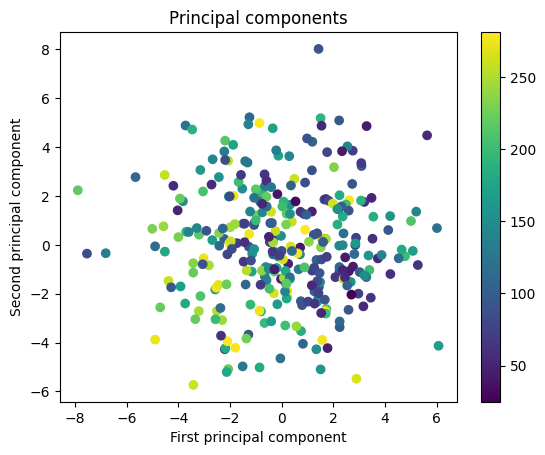

In [24]:
y_pred_pc1 = np.dot(X, U[:,0])
y_pred_pc2 = np.dot(X, U[:,1])

plt.scatter(y_pred_pc1, y_pred_pc2, c=y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Principal components')
plt.colorbar()
plt.show()

e. Plot two principals directions

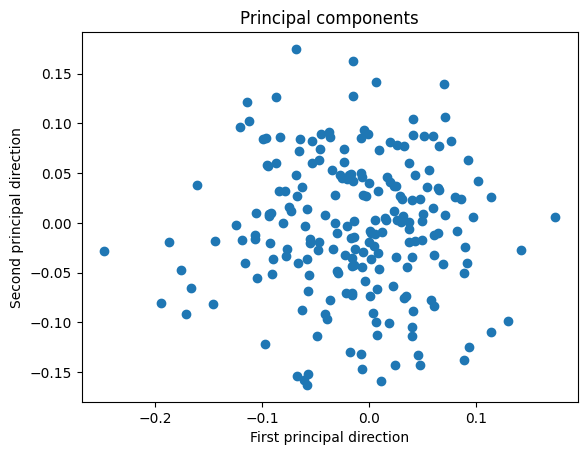

In [25]:
plt.scatter(V[0],V[1])
plt.xlabel('First principal direction')
plt.ylabel('Second principal direction')
plt.title('Principal components')
plt.show()

f. 

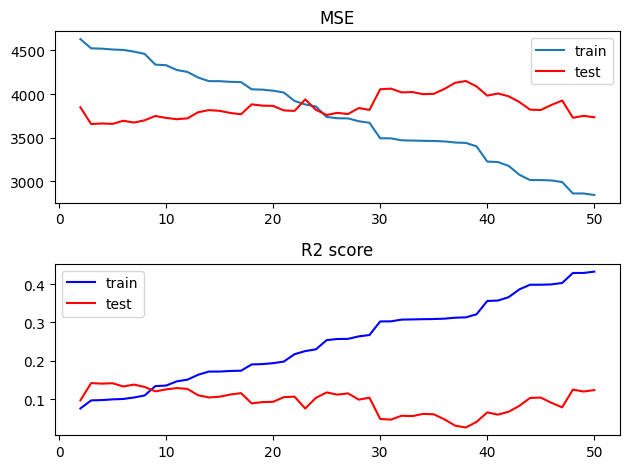

In [28]:
List_mse = []
List_r2 = []

List_mse_test = []
List_r2_test = []

for k in range(2,51):

    ols = LinearRegression()
    
    #Sum of the k first principal components
    X_k = np.dot(X, U[:,:k-1])

    ols.fit(X_k, y_train)

    y_pred = ols.predict(X_k)

    y_pred_test = ols.predict(np.dot(X_test, U[:,:k-1]))

    mse = mean_squared_error(y_train,y_pred)
    r2 = r2_score(y_train,y_pred)

    mse_test = mean_squared_error(y_test,y_pred_test)
    r2_test = r2_score(y_test,y_pred_test)

    List_r2.append(r2)
    List_mse.append(mse)

    List_r2_test.append(r2_test)
    List_mse_test.append(mse_test)

# Create subplots
fig, axs = plt.subplots(2)

# Plot MSE
axs[0].plot(range(2,51), List_mse)
axs[0].plot(range(2,51), List_mse_test, color='red')
axs[0].set_title('MSE')
axs[0].legend(['train', 'test'])

# Plot R2 score
axs[1].plot(range(2,51), List_r2, color='blue')
axs[1].plot(range(2,51), List_r2_test, color='red')
axs[1].set_title('R2 score')
axs[1].legend(['train', 'test'])

plt.tight_layout()

Avec les données test, on obtient un bon résulat pour k=38

## Comparison of the models

C:\Users\Nicolas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.749e+04, tolerance: 1.572e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nicolas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.294e+04, tolerance: 1.572e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nicolas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCach

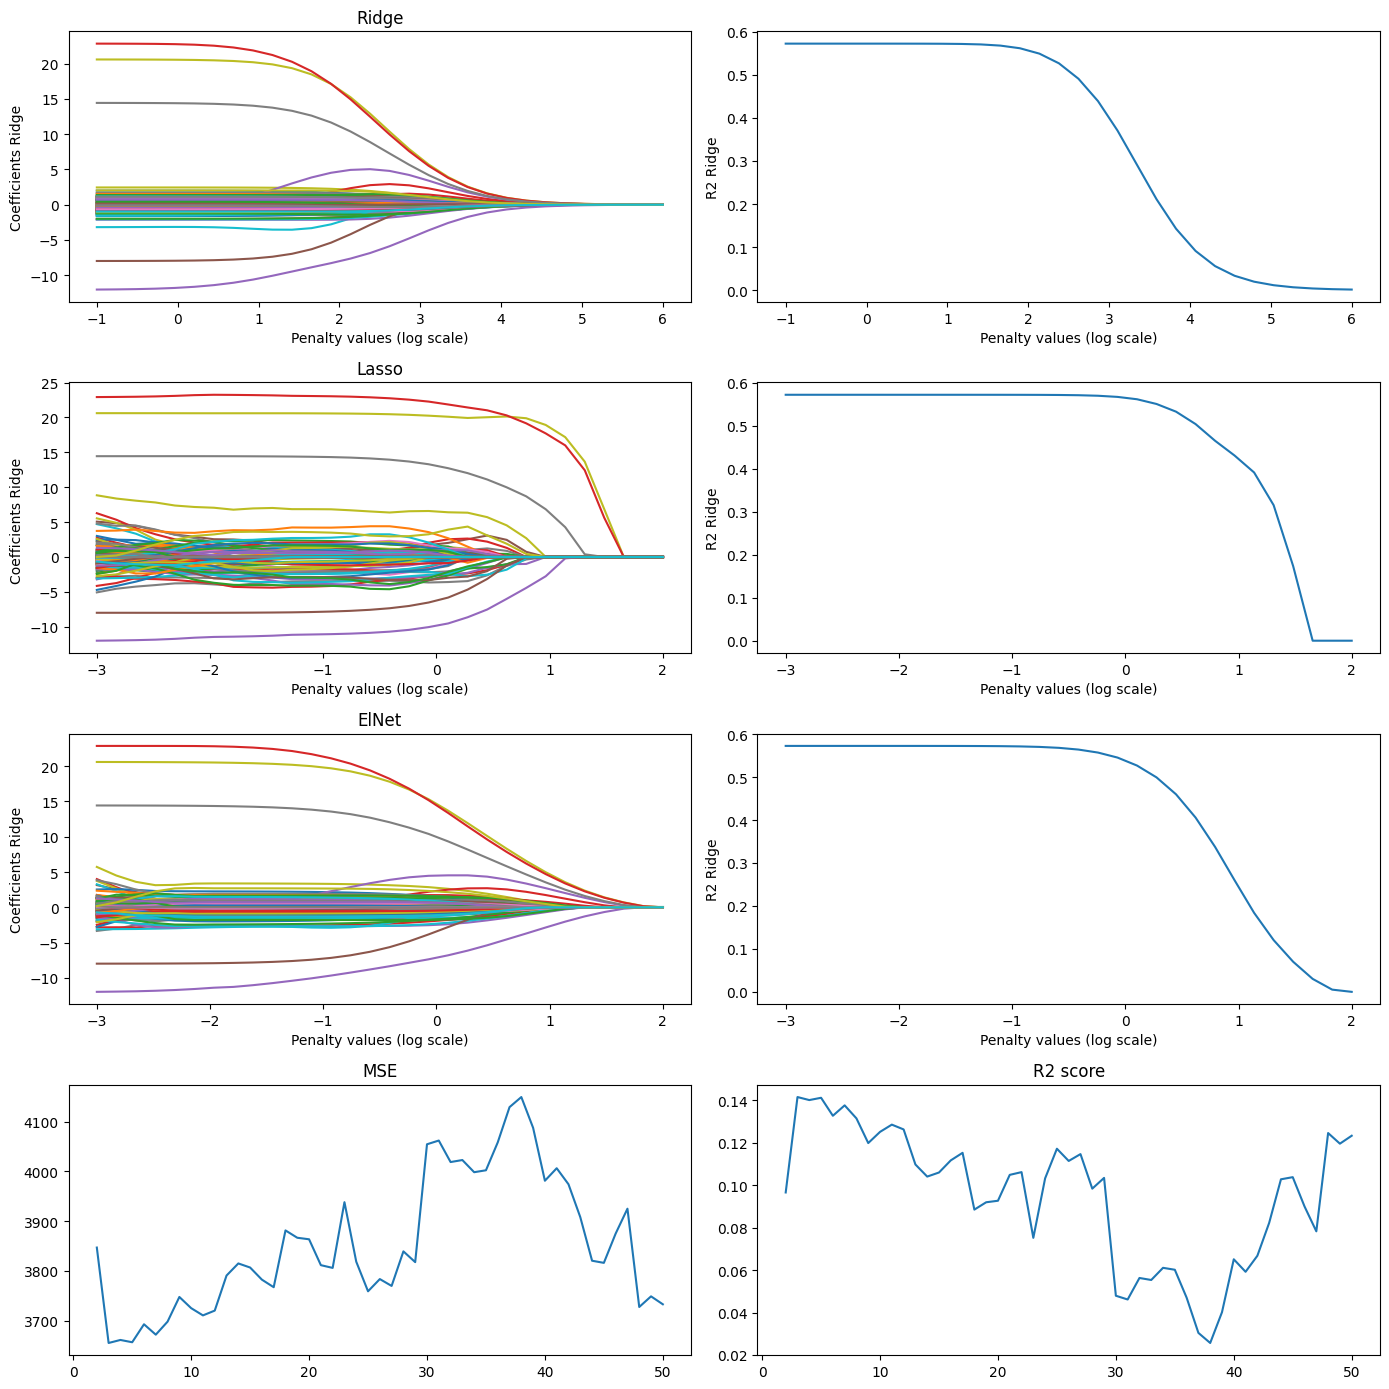

In [29]:
# RIDGE
Coeffs_rdg, penalty_values_rdg , R2_rdg = regression_penalties(Ridge(), X_train, y_train, 1e-1, 1e6)

# LASSO
Coeffs_lasso, penalty_values_lasso , R2_lasso = regression_penalties(Lasso(), X_train, y_train, 1e-3, 1e2)

# ELASTIC NET
Coeffs_ElNet, penalty_values_ElNet , R2_ElNet = regression_penalties(ElasticNet(), X_train, y_train, 1e-3, 1e2)

#PCR
# question d'avant

fig, ax = plt.subplots(4, 2, figsize=(14, 14))

penalties_log = np.log( penalty_values_rdg)/np.log(10)

ax[0,0].set_title('Ridge')
ax[0,0].plot(penalties_log, Coeffs_rdg)
ax[0,0].set_xlabel('Penalty values (log scale)')
ax[0,0].set_ylabel('Coefficients Ridge')

ax[0,1].plot(penalties_log, R2_rdg)
ax[0,1].set_xlabel('Penalty values (log scale)')
ax[0,1].set_ylabel('R2 Ridge')

penalties_log = np.log( penalty_values_lasso)/np.log(10)

ax[1,0].set_title('Lasso')
ax[1,0].plot(penalties_log, Coeffs_lasso)
ax[1,0].set_xlabel('Penalty values (log scale)')
ax[1,0].set_ylabel('Coefficients Ridge ')

ax[1,1].plot(penalties_log, R2_lasso)
ax[1,1].set_xlabel('Penalty values (log scale)')
ax[1,1].set_ylabel('R2 Ridge')

penalties_log = np.log( penalty_values_ElNet)/np.log(10)

ax[2,0].set_title('ElNet')
ax[2,0].plot(penalties_log, Coeffs_ElNet)
ax[2,0].set_xlabel('Penalty values (log scale)')
ax[2,0].set_ylabel('Coefficients Ridge')

ax[2,1].plot(penalties_log,  R2_ElNet)
ax[2,1].set_xlabel('Penalty values (log scale)')
ax[2,1].set_ylabel('R2 Ridge')

ax[3,0].set_title('PCR')
ax[3,0].plot(range(2,51), List_mse_test)
ax[3,0].set_title('MSE')

# Plot R2 score
ax[3,1].plot(range(2,51), List_r2_test)
ax[3,1].set_title('R2 score')

plt.tight_layout()

plt.show()

- RIDGE

Les coefficients sont répartis de manière plus régulière, le coefficient R2 décroit de manière assez continue

- LASSO

Certains coefficients deviennent complétement nuls, le R2 decroit abruptement

- PCR

Cela permet d'avoir un meilleu résultat avec moins coefficient, R2 dimininue puis croit, car on rajoute ensuite des données inutiles au problème qui interferent les modèles de régression.